<a href="https://www.kaggle.com/code/habiibaaa/yolov10final?scriptVersionId=251553169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/runs-outpt/runs_output/detect/train/args.yaml
/kaggle/input/runs-outpt/runs_output/detect/train/labels.jpg
/kaggle/input/runs-outpt/runs_output/detect/train/train_batch2.jpg
/kaggle/input/runs-outpt/runs_output/detect/train/train_batch1.jpg
/kaggle/input/runs-outpt/runs_output/detect/train/train_batch0.jpg
/kaggle/input/runs-outpt/runs_output/detect/train/results.csv
/kaggle/input/runs-outpt/runs_output/detect/train/labels_correlogram.jpg
/kaggle/input/runs-outpt/runs_output/detect/train/weights/last.pt
/kaggle/input/runs-outpt/runs_output/detect/train/weights/best.pt
/kaggle/input/finalyolo/detect/train_backup/args.yaml
/kaggle/input/finalyolo/detect/train_backup/labels.jpg
/kaggle/input/finalyolo/detect/train_backup/train_batch2.jpg
/kaggle/input/finalyolo/detect/train_backup/train_batch1.jpg
/kaggle/input/finalyolo/detect/train_backup/train_batch0.jpg
/kaggle/input/finalyolo/detect/train_backup/results.csv
/kaggle/input/finalyolo/detect/train_backup/labels_correlogram.

In [5]:
!pip install roboflow
!pip install -q roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 30.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
google-cola

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="tbgC3hNmYsnWq0vp6vBo")
project = rf.workspace("fmdv").project("fsoco-kxq3s")
version = project.version(12)
dataset = version.download("yolov9") 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FSOCO-12 in yolov9:: 100%|██████████| 19566/19566 [00:04<00:00, 4828.73it/s]


In [8]:
print("Dataset path:", dataset.location)

Dataset path: /kaggle/working/FSOCO-12


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov10m.yaml")
model.train(data="/kaggle/working/FSOCO-12/data.yaml", epochs=100, imgsz=800)

In [11]:
from ultralytics import YOLO

# Resume from the last checkpoint
print("Resuming training from last checkpoint...")
model = YOLO("/kaggle/working/runs/detect/train2/weights/last.pt")

# Resume training with better settings to prevent crashes
results = model.train(
    resume=True,
    batch=6,        # Smaller batch to prevent crashes
    workers=2,      # Fewer workers
    cache=False,    # Disable caching
    save_period=5   # Save more frequently
)

Resuming training from last checkpoint...
Ultralytics 8.3.151 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/FSOCO-12/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/working/runs/detect/train2/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False

train: Scanning /kaggle/working/FSOCO-12/train/labels.cache... 7120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7120/7120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 451.8±255.9 MB/s, size: 98.0 KB)


val: Scanning /kaggle/working/FSOCO-12/valid/labels.cache... 1968 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1968/1968 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.000515625), 141 bias(decay=0.0)
Resuming training /kaggle/working/runs/detect/train2/weights/last.pt from epoch 4 to 100 total epochs
Image sizes 800 train, 800 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      13.1G      3.616      2.327      2.006        160        800: 100%|██████████| 1187/1187 [09:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.26it/s]


                   all       1968      36123      0.747      0.364      0.414      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.01G      3.266      1.889      1.909        111        800: 100%|██████████| 1187/1187 [09:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.28it/s]


                   all       1968      36123       0.63      0.427      0.463      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.06G       3.05      1.659      1.858        161        800: 100%|██████████| 1187/1187 [09:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.24it/s]


                   all       1968      36123       0.65      0.454      0.489      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       6.1G      2.905      1.524      1.823         86        800: 100%|██████████| 1187/1187 [09:03<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.26it/s]


                   all       1968      36123      0.694      0.463      0.516      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       6.1G        2.8      1.421      1.798         76        800: 100%|██████████| 1187/1187 [09:03<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.23it/s]


                   all       1968      36123      0.692      0.481      0.538      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       6.1G      2.722      1.359      1.779        181        800: 100%|██████████| 1187/1187 [09:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.23it/s]


                   all       1968      36123        0.7      0.496      0.547      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       6.1G      2.635      1.283      1.764        110        800: 100%|██████████| 1187/1187 [09:03<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.24it/s]


                   all       1968      36123      0.714      0.508      0.565      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       6.1G      2.592      1.254      1.758         97        800: 100%|██████████| 1187/1187 [09:03<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.26it/s]


                   all       1968      36123      0.732      0.513      0.571      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       6.1G      2.552      1.226      1.749         90        800: 100%|██████████| 1187/1187 [09:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.27it/s]


                   all       1968      36123       0.74      0.526      0.585      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       6.1G      2.502       1.18      1.736        148        800: 100%|██████████| 1187/1187 [09:03<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.26it/s]


                   all       1968      36123      0.763      0.526       0.59      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       6.1G      2.471      1.167      1.728         88        800: 100%|██████████| 1187/1187 [09:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.14it/s]


                   all       1968      36123      0.752      0.538      0.598      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       6.1G      2.437      1.138      1.725        109        800: 100%|██████████| 1187/1187 [09:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.24it/s]


                   all       1968      36123       0.75      0.539      0.604      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       6.1G      2.408      1.121      1.721         88        800: 100%|██████████| 1187/1187 [09:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:32<00:00,  5.07it/s]


                   all       1968      36123      0.757      0.537      0.604      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       6.1G      2.371      1.101      1.716         66        800: 100%|██████████| 1187/1187 [09:07<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.21it/s]


                   all       1968      36123      0.739      0.548      0.608      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       6.1G      2.363      1.089      1.713        112        800: 100%|██████████| 1187/1187 [09:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.16it/s]


                   all       1968      36123      0.765      0.549      0.615      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       6.1G      2.321      1.059      1.704        151        800: 100%|██████████| 1187/1187 [09:03<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.16it/s]


                   all       1968      36123      0.756      0.555      0.625      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       6.1G      2.311      1.047      1.698         79        800: 100%|██████████| 1187/1187 [09:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:32<00:00,  5.06it/s]


                   all       1968      36123      0.785      0.552      0.622      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       6.1G      2.298      1.043      1.697        131        800: 100%|██████████| 1187/1187 [09:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.23it/s]


                   all       1968      36123      0.767      0.564       0.63      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       6.1G      2.272      1.026      1.693         65        800: 100%|██████████| 1187/1187 [09:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.29it/s]


                   all       1968      36123       0.76      0.561       0.63      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       6.1G      2.248      1.013      1.689         96        800: 100%|██████████| 1187/1187 [09:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.23it/s]


                   all       1968      36123      0.772      0.561      0.637       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       6.1G      2.237      1.004      1.687         21        800: 100%|██████████| 1187/1187 [09:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.27it/s]


                   all       1968      36123      0.782      0.564      0.636      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       6.1G       2.23      1.001      1.688        137        800: 100%|██████████| 1187/1187 [09:03<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.22it/s]


                   all       1968      36123      0.791      0.567      0.643      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       6.1G      2.211     0.9915      1.687         99        800: 100%|██████████| 1187/1187 [09:03<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.24it/s]


                   all       1968      36123      0.805      0.564      0.648      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       6.1G      2.194     0.9818      1.681        150        800: 100%|██████████| 1187/1187 [09:03<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.27it/s]


                   all       1968      36123      0.784      0.574      0.646      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       6.1G      2.179     0.9688       1.68         97        800: 100%|██████████| 1187/1187 [09:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.25it/s]


                   all       1968      36123      0.796      0.565      0.645       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       6.1G      2.157      0.953      1.675         91        800: 100%|██████████| 1187/1187 [09:03<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.28it/s]


                   all       1968      36123      0.795      0.577      0.655      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       6.1G      2.157     0.9542      1.677         62        800: 100%|██████████| 1187/1187 [09:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.28it/s]


                   all       1968      36123      0.804      0.579       0.66      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       6.1G      2.144     0.9484      1.677        138        800: 100%|██████████| 1187/1187 [09:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.30it/s]


                   all       1968      36123        0.8      0.578      0.657       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       6.1G      2.146     0.9462      1.669        114        800: 100%|██████████| 1187/1187 [09:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.26it/s]


                   all       1968      36123      0.785      0.587      0.661      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       6.1G      2.139     0.9375       1.67         51        800: 100%|██████████| 1187/1187 [09:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.19it/s]


                   all       1968      36123        0.8      0.586      0.664      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       6.1G       2.12     0.9302      1.668         83        800: 100%|██████████| 1187/1187 [09:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.21it/s]


                   all       1968      36123      0.806      0.586      0.666      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       6.1G      2.118     0.9324      1.669         79        800: 100%|██████████| 1187/1187 [09:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.19it/s]


                   all       1968      36123      0.799      0.592      0.667      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       6.1G      2.102     0.9266      1.666        164        800: 100%|██████████| 1187/1187 [09:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.21it/s]


                   all       1968      36123      0.804      0.582      0.662      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.11G      2.097     0.9194      1.668        116        800: 100%|██████████| 1187/1187 [09:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.22it/s]


                   all       1968      36123      0.798      0.587      0.667       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.11G       2.08     0.9172      1.666        127        800: 100%|██████████| 1187/1187 [09:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.24it/s]


                   all       1968      36123      0.805      0.587      0.667      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.11G      2.046     0.9002      1.662        161        800: 100%|██████████| 1187/1187 [09:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.30it/s]


                   all       1968      36123      0.809       0.59      0.672      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.11G      2.053     0.9011      1.661        112        800: 100%|██████████| 1187/1187 [09:03<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.27it/s]


                   all       1968      36123      0.812      0.591      0.672      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.11G      2.036     0.8947      1.659        136        800: 100%|██████████| 1187/1187 [09:02<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.26it/s]


                   all       1968      36123      0.788      0.605      0.677      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.11G      2.018     0.8771      1.656        134        800: 100%|██████████| 1187/1187 [09:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.31it/s]


                   all       1968      36123      0.807      0.602       0.68      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.11G      2.009     0.8754      1.652        154        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.30it/s]


                   all       1968      36123      0.802      0.601      0.681      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.11G      2.018     0.8781      1.656        119        800: 100%|██████████| 1187/1187 [09:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.30it/s]


                   all       1968      36123      0.814      0.595       0.68      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.11G      2.002     0.8689      1.653        127        800: 100%|██████████| 1187/1187 [09:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.30it/s]


                   all       1968      36123      0.819       0.59      0.682      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.15G      1.988     0.8671      1.651        117        800: 100%|██████████| 1187/1187 [09:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.30it/s]


                   all       1968      36123      0.818      0.594      0.681      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.15G      1.972     0.8581      1.652        101        800: 100%|██████████| 1187/1187 [09:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.32it/s]


                   all       1968      36123      0.812      0.598      0.682      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.15G      1.972     0.8558      1.649         44        800: 100%|██████████| 1187/1187 [09:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.32it/s]


                   all       1968      36123      0.818      0.596      0.686      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.15G      1.983     0.8546       1.65        243        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.33it/s]


                   all       1968      36123      0.809        0.6      0.687      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.15G      1.964     0.8525      1.646         88        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.815        0.6      0.687      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.15G      1.955     0.8418      1.649        110        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.823      0.597      0.688      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.15G      1.942      0.841      1.644        133        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.33it/s]


                   all       1968      36123      0.815      0.606       0.69      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.15G      1.948     0.8439      1.645         76        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.815      0.607      0.691      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.15G      1.939     0.8314      1.642        127        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.33it/s]


                   all       1968      36123      0.814      0.607      0.693       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.15G      1.919     0.8293      1.644        122        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.819      0.604      0.691      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.15G      1.926     0.8348      1.642        154        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.818      0.604      0.693      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.15G      1.912     0.8286      1.643         96        800: 100%|██████████| 1187/1187 [08:58<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.815      0.607      0.695      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.15G      1.923       0.83      1.645        164        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.818      0.608      0.693      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.15G      1.911      0.821      1.639        124        800: 100%|██████████| 1187/1187 [08:58<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.813      0.611      0.696      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.15G      1.909     0.8213      1.641        193        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.33it/s]


                   all       1968      36123      0.818      0.608      0.696      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.15G      1.897     0.8111      1.636         87        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.831      0.604      0.699      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.15G       1.89     0.8115      1.636        153        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.823      0.609      0.701      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.15G      1.886     0.8038      1.637        117        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.33it/s]


                   all       1968      36123      0.832      0.608        0.7      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.15G      1.877     0.8005      1.638        141        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123       0.82      0.611      0.704       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.15G      1.876     0.7973      1.637         50        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.823       0.61      0.701      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.15G      1.875     0.8006      1.634        151        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.33it/s]


                   all       1968      36123      0.817      0.611      0.698      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.15G       1.87     0.7946      1.635        119        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.816      0.609        0.7      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.15G      1.868      0.795      1.634         53        800: 100%|██████████| 1187/1187 [08:59<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.34it/s]


                   all       1968      36123      0.818      0.615      0.702       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.15G      1.865      0.796      1.634        137        800: 100%|██████████| 1187/1187 [09:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.33it/s]


                   all       1968      36123      0.818      0.612      0.701       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.15G      1.852     0.7909      1.634         90        800: 100%|██████████| 1187/1187 [09:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.29it/s]


                   all       1968      36123      0.815      0.614        0.7       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.15G       1.87     0.7916      1.625        187        800:   6%|▌         | 68/1187 [00:31<08:32,  2.18it/s]


KeyboardInterrupt: 

In [12]:
# # After training finishes, immediately save your models
# import shutil
# import os

# # Create a backup folder
# os.makedirs('/kaggle/working/my_trained_models', exist_ok=True)

# try:
#     # Copy your trained models
#     shutil.copytree('/kaggle/working/runs/detect/train2', 
#                     '/kaggle/working/my_trained_models/yolov10_train2')
#     print("✅ Full training folder copied")
# except Exception as e:
#     print(f"⚠️ Couldn't copy full folder: {e}")

# # Copy individual weight files (more reliable)
# try:
#     shutil.copy2('/kaggle/working/runs/detect/train2/weights/best.pt', 
#                  '/kaggle/working/my_trained_models/yolov10_best.pt')
#     print("✅ Best weights saved")
# except Exception as e:
#     print(f"⚠️ Couldn't copy best.pt: {e}")

# try:
#     shutil.copy2('/kaggle/working/runs/detect/train2/weights/last.pt', 
#                  '/kaggle/working/my_trained_models/yolov10_last.pt')
#     print("✅ Last checkpoint saved")
# except Exception as e:
#     print(f"⚠️ Couldn't copy last.pt: {e}")

# # Copy training history and config
# try:
#     shutil.copy2('/kaggle/working/runs/detect/train2/results.csv', 
#                  '/kaggle/working/my_trained_models/results.csv')
#     print("✅ Training results saved")
# except Exception as e:
#     print(f"⚠️ Couldn't copy results.csv: {e}")

# try:
#     shutil.copy2('/kaggle/working/runs/detect/train2/args.yaml', 
#                  '/kaggle/working/my_trained_models/args.yaml')
#     print("✅ Training config saved")
# except Exception as e:
#     print(f"⚠️ Couldn't copy args.yaml: {e}")

# print("✅ Models saved to my_trained_models folder")

# # List what was saved
# print("\nSaved files:")
# for file in os.listdir('/kaggle/working/my_trained_models'):
#     print(f"- {file}")

✅ Full training folder copied
✅ Best weights saved
✅ Last checkpoint saved
✅ Training results saved
✅ Training config saved
✅ Models saved to my_trained_models folder

Saved files:
- args.yaml
- yolov10_train2
- yolov10_best.pt
- results.csv
- yolov10_last.pt


In [14]:
# # After training finishes, immediately save your models
# import shutil
# import os


# try:
#     # Copy the ENTIRE runs folder
#     shutil.copytree('/kaggle/working/runs', 
#                     '/kaggle/working/my_trained_models/runs_backup')
#     print("✅ Entire runs folder copied")
# except Exception as e:
#     print(f"⚠️ Couldn't copy runs folder: {e}")


✅ Entire runs folder copied


In [17]:
# import shutil

# # Zip the entire my_trained_models folder
# shutil.make_archive('yolov10_backup', 'zip', '/kaggle/working/my_trained_models')

'/kaggle/working/yolov10_backup.zip'

In [19]:
# import shutil

# # Create a zip archive of your backup folder
# shutil.make_archive('/kaggle/working/yolov10_backup', 'zip', '/kaggle/working/my_trained_models')
# print("✅ Zipped backup folder as yolov10_backup.zip")

✅ Zipped backup folder as yolov10_backup.zip


In [23]:
# from IPython.display import FileLink

# FileLink('yolov10_backup.zip')

/kaggle/working/yolov10_backup.zip

In [6]:
import shutil
import os

# Source folder (your uploaded dataset)
src_folder = "/kaggle/input/runs-outpt"  # folder you uploaded

# Destination
dst_folder = "/kaggle/working/runs-outpt"

# Copy the uploaded folder into working directory
shutil.copytree(src_folder, dst_folder)

print("✅ Folder copied to working directory!")

# List contents
print("\nContents of working folder:")
for item in os.listdir(dst_folder):
    print(f"- {item}")

✅ Folder copied to working directory!

Contents of working folder:
- runs_output


In [9]:
from ultralytics import YOLO

# Resume from the last checkpoint
print("Resuming training from last checkpoint...")
model = YOLO("/kaggle/working/runs-outpt/runs_output/detect/train/weights/last.pt")

# Resume training and specify where to save
results = model.train(
    resume=True,
    project="/kaggle/working/runs-outpt/runs_output",  # Specify project path
    name="train",
    batch=6,
    workers=2,
    cache=False,
    save_period=5
)

Resuming training from last checkpoint...
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/FSOCO-12/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/working/runs-outpt/runs_output/detect/train/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=F

train: Scanning /kaggle/working/FSOCO-12/train/labels.cache... 7120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7120/7120 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 292.6±50.6 MB/s, size: 98.0 KB)


val: Scanning /kaggle/working/FSOCO-12/valid/labels.cache... 1968 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1968/1968 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.000515625), 141 bias(decay=0.0)
Resuming training /kaggle/working/runs-outpt/runs_output/detect/train/weights/last.pt from epoch 88 to 100 total epochs
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.88G      1.753     0.7337      1.616         36        800: 100%|██████████| 1187/1187 [07:59<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:31<00:00,  5.22it/s]


                   all       1968      36123      0.825      0.628      0.715      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.92G      1.763     0.7357      1.619        130        800: 100%|██████████| 1187/1187 [07:59<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.31it/s]


                   all       1968      36123      0.829      0.624      0.716      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.98G      1.747     0.7325      1.616        174        800: 100%|██████████| 1187/1187 [08:00<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.33it/s]


                   all       1968      36123      0.828      0.625      0.717      0.509
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.01G       1.76     0.7277      1.616         27        800: 100%|██████████| 1187/1187 [07:54<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.30it/s]


                   all       1968      36123      0.828      0.622      0.715      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.01G       1.76     0.7213      1.614         45        800: 100%|██████████| 1187/1187 [07:53<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.31it/s]


                   all       1968      36123      0.833       0.62      0.716      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.01G      1.746     0.7152      1.615         67        800: 100%|██████████| 1187/1187 [07:53<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.31it/s]


                   all       1968      36123      0.832      0.622      0.716      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.01G      1.736     0.7096       1.61         34        800: 100%|██████████| 1187/1187 [07:53<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.31it/s]


                   all       1968      36123      0.831      0.624      0.716      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.01G      1.734     0.7107      1.613         60        800: 100%|██████████| 1187/1187 [07:53<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.31it/s]


                   all       1968      36123      0.831      0.624      0.716      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.01G      1.716     0.7003       1.61         64        800: 100%|██████████| 1187/1187 [07:53<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.30it/s]


                   all       1968      36123      0.833      0.623      0.717      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.01G       1.72     0.6991      1.607         97        800: 100%|██████████| 1187/1187 [07:53<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.33it/s]


                   all       1968      36123       0.83      0.626      0.717      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.01G      1.713     0.6979       1.61         55        800: 100%|██████████| 1187/1187 [07:53<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.31it/s]


                   all       1968      36123       0.83      0.626      0.717      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.01G      1.714      0.698      1.611         50        800: 100%|██████████| 1187/1187 [07:53<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.31it/s]


                   all       1968      36123      0.831      0.625      0.717      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.01G      1.702     0.6901      1.608         69        800: 100%|██████████| 1187/1187 [07:53<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:30<00:00,  5.33it/s]


                   all       1968      36123      0.834      0.623      0.717      0.509

13 epochs completed in 1.830 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 33.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10m summary (fused): 136 layers, 15,316,063 parameters, 0 gradients, 58.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 164/164 [00:26<00:00,  6.21it/s]
invalid value encountered in less
invalid value encountered in less


                   all       1968      36123      0.832      0.624      0.717      0.509
             blue_cone       1416      12720      0.925      0.631      0.783       0.56
     large_orange_cone        428       1263      0.843      0.783      0.835      0.653
           orange_cone        850       5462       0.91      0.629      0.755      0.526
          unknown_cone        178       1073      0.565      0.447      0.439      0.259
           yellow_cone       1638      15605      0.918      0.629      0.773      0.545
Speed: 0.2ms preprocess, 8.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train


In [10]:
import shutil
import os
import pandas as pd

def merge_yolo_training_results_smart(original_folder, new_folder, clean_up=True, backup=True, metric_column='metrics/mAP50-95(B)', use_loss=False):
    """
    Smart merge that preserves the GLOBALLY best model, not just the recent best.
    
    Args:
        original_folder (str): Path to original training folder
        new_folder (str): Path to new training folder  
        clean_up (bool): Whether to delete new_folder after merging
        backup (bool): Whether to create backup before merging
        metric_column (str): Column name to determine "best" model (default: mAP50-95)
    """
    print("🔄 Smart merging YOLO training results...")
    
    # 0. Backup
    if backup:
        backup_folder = original_folder + "_backup"
        if not os.path.exists(backup_folder):
            shutil.copytree(original_folder, backup_folder)
            print(f"🛡️ Backup created at: {backup_folder}")

    # 1. SMART WEIGHTS UPDATE - Compare metrics first!
    print("🧠 Smart weights update (comparing metrics)...")
    
    try:
        # Read both CSV files to compare performance
        original_csv = f"{original_folder}/results.csv"
        new_csv = f"{new_folder}/results.csv"
        
        original_df = pd.read_csv(original_csv)
        new_df = pd.read_csv(new_csv)
        
        # Find the best epoch from original training (epochs 1-87)
        if use_loss:  # For loss metrics, lower is better
            original_best_idx = original_df[metric_column].idxmin()
            new_best_idx = new_df[metric_column].idxmin()
        else:  # For mAP/accuracy metrics, higher is better
            original_best_idx = original_df[metric_column].idxmax()
            new_best_idx = new_df[metric_column].idxmax()
            
        original_best_metric = original_df.loc[original_best_idx, metric_column]
        original_best_epoch = original_df.loc[original_best_idx, 'epoch']
        
        # Find the best epoch from new training (epochs 88+)
        new_best_metric = new_df.loc[new_best_idx, metric_column]
        new_best_epoch = new_df.loc[new_best_idx, 'epoch']
        
        print(f"📊 PERFORMANCE COMPARISON:")
        print(f"   🏆 Original best: Epoch {original_best_epoch} = {original_best_metric:.4f}")
        print(f"   🆕 Recent best:   Epoch {new_best_epoch} = {new_best_metric:.4f}")
        
        # Decide which best.pt to keep
        if use_loss:  # For loss: lower is better
            keep_original = original_best_metric <= new_best_metric
        else:  # For mAP: higher is better  
            keep_original = original_best_metric >= new_best_metric
            
        if keep_original:
            print(f"✅ KEEPING original best.pt (Epoch {original_best_epoch}) - Better performance!")
            keep_original_best = True
        else:
            print(f"🔄 UPDATING to new best.pt (Epoch {new_best_epoch}) - New best found!")
            shutil.copy(f"{new_folder}/weights/best.pt", f"{original_folder}/weights/best.pt")
            keep_original_best = False
            
        # Always update last.pt (most recent)
        if os.path.exists(f"{new_folder}/weights/last.pt"):
            shutil.copy(f"{new_folder}/weights/last.pt", f"{original_folder}/weights/last.pt")
            print("✅ last.pt updated (most recent weights)")
            
        # Save info about which model is truly the best
        best_info = {
            'global_best_epoch': original_best_epoch if keep_original_best else new_best_epoch,
            'global_best_metric': original_best_metric if keep_original_best else new_best_metric,
            'metric_used': metric_column,
            'kept_original_best': keep_original_best
        }
        
        with open(f"{original_folder}/best_model_info.txt", "w") as f:
            f.write("GLOBAL BEST MODEL INFO\n")
            f.write("=" * 30 + "\n")
            f.write(f"Best Epoch: {best_info['global_best_epoch']}\n")
            f.write(f"Best {metric_column}: {best_info['global_best_metric']:.4f}\n")
            f.write(f"Source: {'Original training' if keep_original_best else 'Recent training'}\n")
            f.write(f"Updated: {pd.Timestamp.now()}\n")
        
        print("📝 best_model_info.txt created with global best model details")
        
    except Exception as e:
        print(f"⚠️ Error in smart weights comparison: {e}")
        print("⚠️ Falling back to simple copy...")
        # Fallback to original behavior
        if os.path.exists(f"{new_folder}/weights/best.pt"):
            shutil.copy(f"{new_folder}/weights/best.pt", f"{original_folder}/weights/best.pt")
        if os.path.exists(f"{new_folder}/weights/last.pt"):
            shutil.copy(f"{new_folder}/weights/last.pt", f"{original_folder}/weights/last.pt")

    # 2. Merge CSV results (same as before)
    print("📊 Merging results.csv...")
    try:
        original_df = pd.read_csv(original_csv)
        new_df = pd.read_csv(new_csv)
        
        # Filter only new epochs
        new_epochs = set(new_df['epoch']) - set(original_df['epoch'])
        new_df_filtered = new_df[new_df['epoch'].isin(new_epochs)]
        
        # Combine and sort
        combined_df = pd.concat([original_df, new_df_filtered], ignore_index=True)
        combined_df = combined_df.sort_values('epoch').reset_index(drop=True)
        
        # Save merged CSV
        combined_df.to_csv(original_csv, index=False)
        print("✅ results.csv merged and updated")
        
        # Print final stats
        if use_loss:
            best_value = combined_df[metric_column].min()
            best_epoch = combined_df.loc[combined_df[metric_column].idxmin(), 'epoch']
        else:
            best_value = combined_df[metric_column].max()
            best_epoch = combined_df.loc[combined_df[metric_column].idxmax(), 'epoch']
            
        print(f"📈 FINAL TRAINING STATS:")
        print(f"   Total epochs: {len(combined_df)}")
        print(f"   Global best {metric_column}: {best_value:.4f} (Epoch {best_epoch})")
        
    except Exception as e:
        print(f"⚠️ Error merging CSV: {e}")

    # 3-5. Rest of the function (args.yaml, images, cleanup) - same as your original
    print("⚙️ Updating args.yaml...")
    try:
        if os.path.exists(f"{new_folder}/args.yaml"):
            shutil.copy(f"{new_folder}/args.yaml", f"{original_folder}/args.yaml")
            print("✅ args.yaml updated")
    except Exception as e:
        print(f"⚠️ Error copying args.yaml: {e}")

    # Update result images
    print("🖼️ Updating result plots...")
    standard_images = ['results.png', 'confusion_matrix.png', 'F1_curve.png',
                      'P_curve.png', 'PR_curve.png', 'R_curve.png',
                      'labels.jpg', 'labels_correlogram.jpg']
    
    for img_file in standard_images:
        try:
            src = f"{new_folder}/{img_file}"
            dst = f"{original_folder}/{img_file}"
            if os.path.exists(src):
                shutil.copy(src, dst)
                print(f"✅ {img_file} updated")
        except Exception as e:
            print(f"⚠️ Error copying {img_file}: {e}")

    # Handle train_batch images
    print("🖼️ Adding new train_batch images...")
    for file in os.listdir(new_folder):
        if file.startswith('train_batch') and file.endswith('.jpg'):
            try:
                src = f"{new_folder}/{file}"
                dst = f"{original_folder}/{file}"
                if not os.path.exists(dst):
                    shutil.copy(src, dst)
                    print(f"✅ {file} added")
            except Exception as e:
                print(f"⚠️ Error copying {file}: {e}")

    # Cleanup
    if clean_up:
        print("🧹 Cleaning up temporary folder...")
        try:
            shutil.rmtree(new_folder)
            print(f"✅ Removed {new_folder}")
        except Exception as e:
            print(f"⚠️ Could not remove {new_folder}: {e}")

    print("\n🎉 Smart merge complete!")
    print(f"📁 All results consolidated in: {original_folder}")
    print("🏆 The best.pt file contains the GLOBALLY best model across ALL epochs!")


# USAGE: Replace your merge call with this:
print("\n" + "="*50)
print("🔗 SMART MERGING TRAINING RESULTS...")
print("="*50)

original_folder = "/kaggle/working/runs-outpt/runs_output/detect/train"
new_folder = "/kaggle/working/runs/detect/train"

# USAGE EXAMPLES:

# Option 1: Use mAP50-95 (RECOMMENDED - most comprehensive)
merge_yolo_training_results_smart(
    original_folder=original_folder,
    new_folder=new_folder,
    clean_up=True,
    backup=True,
    metric_column='metrics/mAP50-95(B)',
    use_loss=False
)


print("✨ Your best.pt is now GUARANTEED to be the globally best model!")


🔗 SMART MERGING TRAINING RESULTS...
🔄 Smart merging YOLO training results...
🛡️ Backup created at: /kaggle/working/runs-outpt/runs_output/detect/train_backup
🧠 Smart weights update (comparing metrics)...
📊 PERFORMANCE COMPARISON:
   🏆 Original best: Epoch 87 = 0.5074
   🆕 Recent best:   Epoch 96 = 0.5087
🔄 UPDATING to new best.pt (Epoch 96) - New best found!
✅ last.pt updated (most recent weights)
📝 best_model_info.txt created with global best model details
📊 Merging results.csv...
✅ results.csv merged and updated
📈 FINAL TRAINING STATS:
   Total epochs: 102
   Global best metrics/mAP50-95(B): 0.5087 (Epoch 96)
⚙️ Updating args.yaml...
✅ args.yaml updated
🖼️ Updating result plots...
✅ results.png updated
✅ confusion_matrix.png updated
✅ F1_curve.png updated
✅ P_curve.png updated
✅ PR_curve.png updated
✅ R_curve.png updated
✅ labels.jpg updated
✅ labels_correlogram.jpg updated
🖼️ Adding new train_batch images...
✅ train_batch106831.jpg added
✅ train_batch106830.jpg added
✅ train_batch1

In [17]:
from ultralytics import YOLO

# Load your globally best model
model = YOLO("/kaggle/working/runs-outpt/detect/train/weights/best.pt")

# Re-validate to generate complete plots
results = model.val(
    data="/kaggle/working/FSOCO-12/data.yaml",
    project="/kaggle/working/runs-outpt",
    name="final_validation"
)

Ultralytics 8.3.152 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv10m summary (fused): 136 layers, 15,316,063 parameters, 0 gradients, 58.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1626.0±504.5 MB/s, size: 83.7 KB)


val: Scanning /kaggle/working/FSOCO-12/valid/labels.cache... 1968 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1968/1968 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 123/123 [34:31<00:00, 16.84s/it]
invalid value encountered in less
invalid value encountered in less


                   all       1968      36123      0.833      0.623      0.717      0.511
             blue_cone       1416      12720      0.926      0.631      0.783      0.563
     large_orange_cone        428       1263      0.842      0.782      0.833      0.653
           orange_cone        850       5462      0.911      0.628      0.755      0.529
          unknown_cone        178       1073      0.566      0.446      0.438      0.259
           yellow_cone       1638      15605      0.919      0.629      0.775      0.548
Speed: 5.4ms preprocess, 1033.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /kaggle/working/runs-outpt/final_validation


🔄 Generating complete training results plot...
📊 Loaded 100 epochs of training data
✅ Complete training results saved to: /kaggle/working/runs-outpt/detect/train/results_complete.png
📁 Original results.png remains unchanged

📈 TRAINING SUMMARY:
   Total epochs: 100
   Best mAP50-95: 0.5087 (Epoch 96)
   Final mAP50-95: 0.5086 (Epoch 100)
   Best mAP50: 0.7170


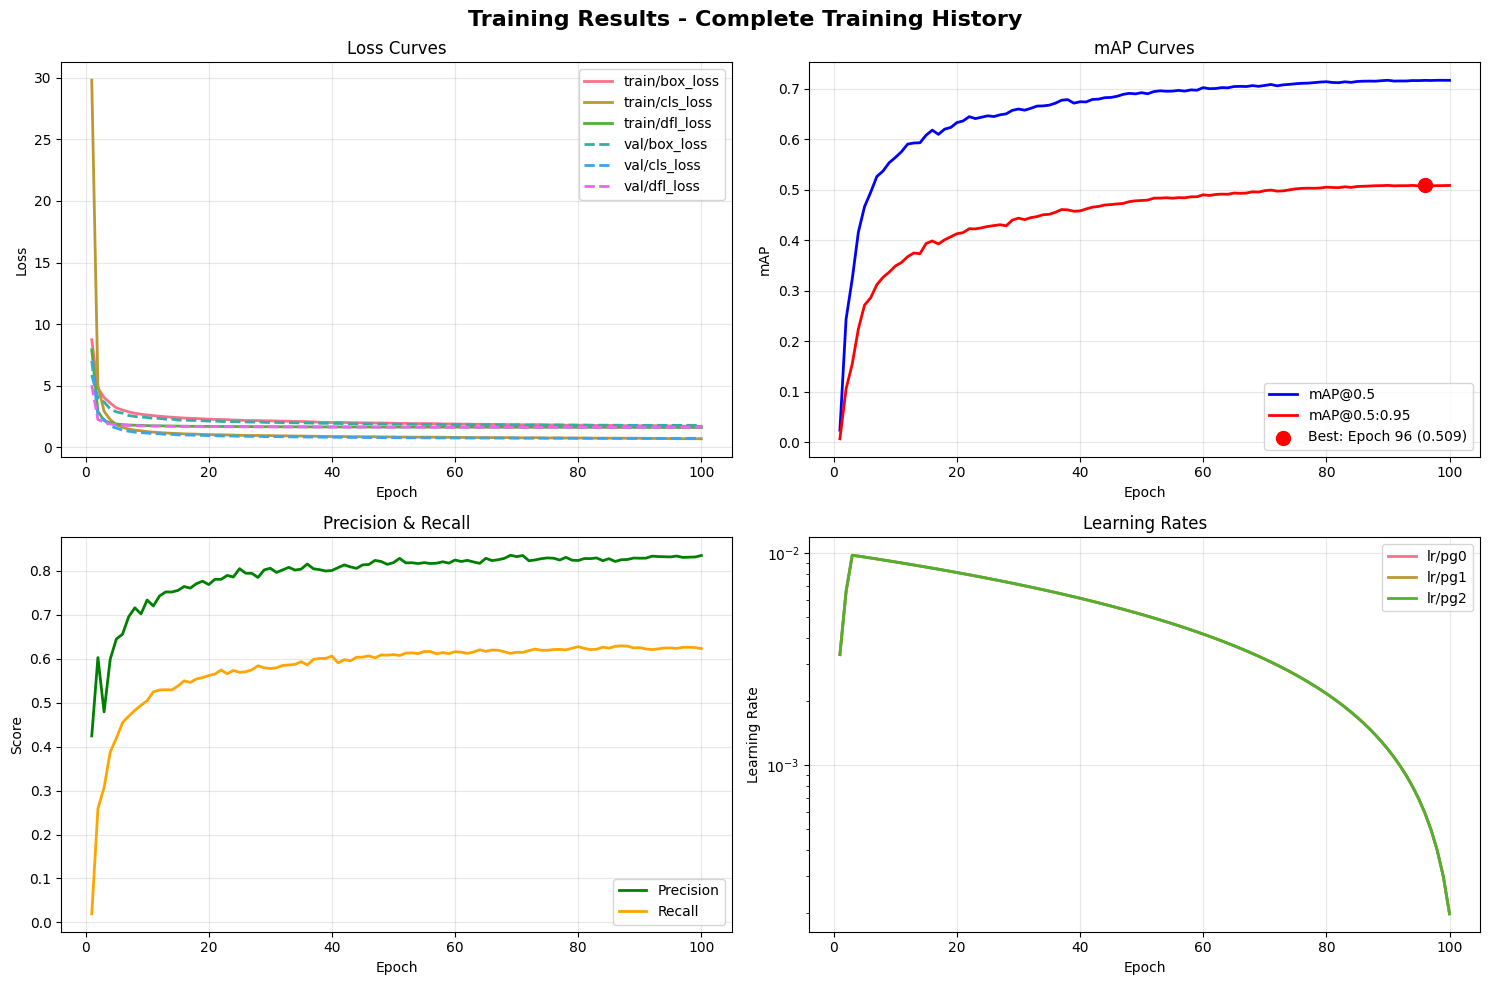

🎉 Complete! Your full training history is now saved as 'results_complete.png'!
📊 The original 'results.png' file remains untouched.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def regenerate_yolo_results_plot(results_csv_path, save_path=None):
    """
    Regenerate YOLO-style results plot from your merged results.csv
    Creates a new separate file instead of overwriting existing results.png
    
    Args:
        results_csv_path (str): Path to your merged results.csv
        save_path (str): Where to save the plot (if None, saves as results_complete.png)
    """
    
    # Read the merged results
    df = pd.read_csv(results_csv_path)
    print(f"📊 Loaded {len(df)} epochs of training data")
    
    # Set up the plot style (YOLO-like)
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create figure with subplots (2x2 grid like YOLO)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Training Results - Complete Training History', fontsize=16, fontweight='bold')
    
    epochs = df['epoch']
    
    # Plot 1: Loss curves
    ax1.plot(epochs, df['train/box_loss'], label='train/box_loss', linewidth=2)
    ax1.plot(epochs, df['train/cls_loss'], label='train/cls_loss', linewidth=2)
    ax1.plot(epochs, df['train/dfl_loss'], label='train/dfl_loss', linewidth=2)
    ax1.plot(epochs, df['val/box_loss'], label='val/box_loss', linewidth=2, linestyle='--')
    ax1.plot(epochs, df['val/cls_loss'], label='val/cls_loss', linewidth=2, linestyle='--')
    ax1.plot(epochs, df['val/dfl_loss'], label='val/dfl_loss', linewidth=2, linestyle='--')
    ax1.set_title('Loss Curves')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: mAP curves
    ax2.plot(epochs, df['metrics/mAP50(B)'], label='mAP@0.5', linewidth=2, color='blue')
    ax2.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', linewidth=2, color='red')
    
    # Highlight the best epoch
    best_epoch_idx = df['metrics/mAP50-95(B)'].idxmax()
    best_epoch = df.loc[best_epoch_idx, 'epoch']
    best_score = df.loc[best_epoch_idx, 'metrics/mAP50-95(B)']
    
    ax2.scatter(best_epoch, best_score, color='red', s=100, zorder=5, 
               label=f'Best: Epoch {best_epoch} ({best_score:.3f})')
    ax2.set_title('mAP Curves')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('mAP')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Precision and Recall
    ax3.plot(epochs, df['metrics/precision(B)'], label='Precision', linewidth=2, color='green')
    ax3.plot(epochs, df['metrics/recall(B)'], label='Recall', linewidth=2, color='orange')
    ax3.set_title('Precision & Recall')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Score')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Learning Rates
    ax4.plot(epochs, df['lr/pg0'], label='lr/pg0', linewidth=2)
    ax4.plot(epochs, df['lr/pg1'], label='lr/pg1', linewidth=2)
    ax4.plot(epochs, df['lr/pg2'], label='lr/pg2', linewidth=2)
    ax4.set_title('Learning Rates')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Learning Rate')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_yscale('log')  # Log scale for learning rates
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the plot with a different name to avoid overwriting
    if save_path is None:
        # Create a new filename instead of overwriting results.png
        base_path = results_csv_path.replace('results.csv', '')
        save_path = f"{base_path}results_complete.png"
    
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✅ Complete training results saved to: {save_path}")
    print(f"📁 Original results.png remains unchanged")
    
    # Show summary stats
    print(f"\n📈 TRAINING SUMMARY:")
    print(f"   Total epochs: {len(df)}")
    print(f"   Best mAP50-95: {df['metrics/mAP50-95(B)'].max():.4f} (Epoch {best_epoch})")
    print(f"   Final mAP50-95: {df['metrics/mAP50-95(B)'].iloc[-1]:.4f} (Epoch {df['epoch'].iloc[-1]})")
    print(f"   Best mAP50: {df['metrics/mAP50(B)'].max():.4f}")
    
    plt.show()
    return fig

# USAGE:
print("🔄 Generating complete training results plot...")

# Path to your merged results.csv
csv_path = "/kaggle/working/runs-outpt/detect/train/results.csv"

# Generate the new plot (will save as results_complete.png)
fig = regenerate_yolo_results_plot(
    results_csv_path=csv_path,
    save_path="/kaggle/working/runs-outpt/detect/train/results_complete.png"
)

print("🎉 Complete! Your full training history is now saved as 'results_complete.png'!")
print("📊 The original 'results.png' file remains untouched.")

In [19]:
import shutil
import os

# New destination folder with unique name (e.g., 'final_model_v1')
dest = '/kaggle/working/final_model'
os.makedirs(dest, exist_ok=True)

try:
    shutil.copytree('/kaggle/working/runs-outpt', 
                '/kaggle/working/final_model', 
                dirs_exist_ok=True)
    print("✅ Entire runs folder copied")
except Exception as e:
    print(f"⚠️ Couldn't copy runs folder: {e}")

# List what was saved
print("\nSaved files:")
for file in os.listdir(dest):
    print(f"- {file}")

✅ Entire runs folder copied

Saved files:
- runs_output
- final_validation
- detect


In [20]:
import shutil

# Zip the entire my_trained_models folder
shutil.make_archive('finalllll', 'zip', '/kaggle/working/final_model')

'/kaggle/working/finalllll.zip'

In [21]:
from IPython.display import FileLink

FileLink('finalllll.zip')

/kaggle/working/finalllll.zip